# Imbalanced Dataset
This jupyter notebook focuses on ways of dealing with Imbalanced daataset <br>

As an example, <b>Credit Card Fraud</b> data taken from Kaggle <br>

Following things are covered:
<ol>
<li>Getting Data</li>
<li>Exploratory Data Analysis (EDA)</li>
<ul>
<li>Traditional</li>
<li>Tensorflow validator</li>
<li>Lux</li>
</ul>
<li>Different Sampling Techniques</li>
<ul>
<li>Without sampling</li>
<li>With under sampling</li>
<li>With over sampling - duplicate data</li>
<li>With over sampling using SMOTE - synthetic data</li>
</ul>
<li>Feature Extraction</li>
<li>Model Building</li>
<li>Model Evaluation</li>
<li>Takeaways</li>
</ol>

<b>Note:</b> This file focuses on Getting data and EDA techniques <br>
Files will be saved and later used for sampling

In [1]:
# import library
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow_data_validation as tfdv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import warnings
warnings.filterwarnings('ignore')

# 1. Getting Data

In [2]:
# import data into pandas
df = pd.read_csv("./Dataset/creditcard.csv")

# check first 5 records
df.head(n=5)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

# 2. Exploratory Data Analysis (EDA)
<b>Dataset contains 31 columns</b>
<ul>
<li><b>Features:</b> {Time, V1, V2, ...... , V28, Amount}</li>
<li><b>Target:</b> Class</li>
</ul>

In [3]:
# Get a little bit more information such as
#   - column dtype
#   - column names
#   - null values if any then data cleaning
#   - number of data points
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Describe dataset little bit more and get important statistics
#   - min
#   - max
#   - mean
#   - distribution
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [5]:
# check the distribution of classes
print(df['Amount'].groupby(df['Class']).count())
print(df['Amount'].groupby(df['Class']).count()/len(df)*100)

Class
0    284315
1       492
Name: Amount, dtype: int64
Class
0    99.827251
1     0.172749
Name: Amount, dtype: float64


<b>Dataset contains</b>
<ul>
<li>99.8% of Class 0 with 284315 data points</li>
<li>0.2% of Class 1 with    492 data poiints</li>
</ul>
Highly imbalanced Dataset


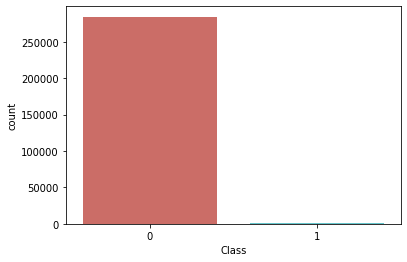

In [6]:
sns.countplot(x = 'Class', data=df, palette='hls')
plt.show() 

Let's check data distribution more closely. <br>
Line 4 suggested that data has extreme outliers, it's time for some visuallization

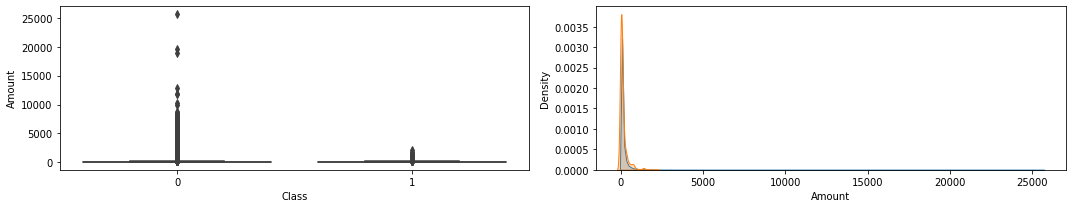

In [7]:
# Amount
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,3))
sns.boxplot(x='Class', y='Amount', data=df, ax=ax1)
sns.kdeplot(df.Amount[df.Class == 0], label = 'Not Fraud', shade=True, ax=ax2)
sns.kdeplot(df.Amount[df.Class == 1], label = 'Fraud', shade=True, ax=ax2)
fig.tight_layout()

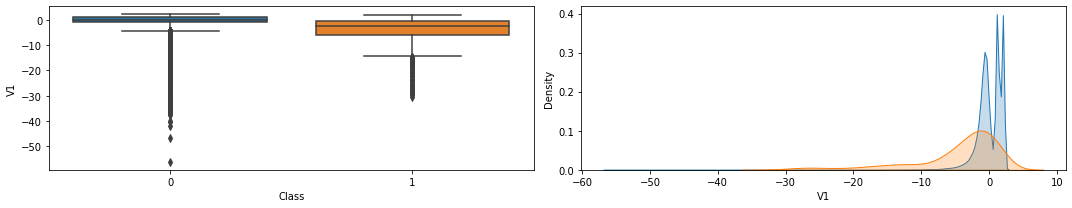

In [8]:
# V1
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,3))
sns.boxplot(x='Class', y='V1', data=df, ax=ax1)
sns.kdeplot(df.V1[df.Class == 0], label = 'Not Fraud', shade=True, ax=ax2)
sns.kdeplot(df.V1[df.Class == 1], label = 'Fraud', shade=True, ax=ax2)
fig.tight_layout()

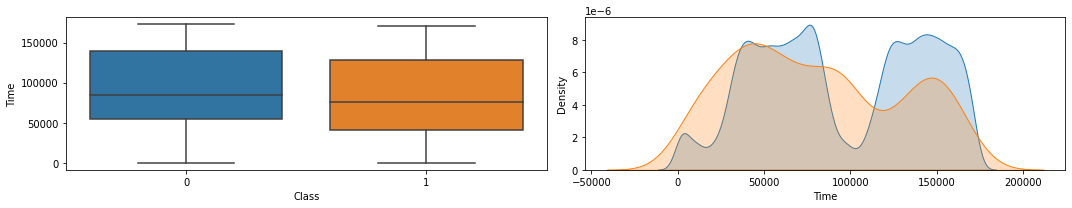

In [9]:
# Time
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,3))
sns.boxplot(x='Class', y='Time', data=df, ax=ax1)
sns.kdeplot(df.Time[df.Class == 0], label = 'Not Fraud', shade=True, ax=ax2)
sns.kdeplot(df.Time[df.Class == 1], label = 'Fraud', shade=True, ax=ax2)
fig.tight_layout()

<b>Two conclusions</b>
<ul>
<li>Extreme outliers</li>
<li>Some data seems bimodal distribution</li>
</ul>
First Data needs to be clipped to remove any outliers <br>
Before that Split data in order to aviod any leakage to test dataset when sampling is done

In [10]:
# drop time column
df = df.drop(['Time'], axis=1)
df.head(n=5)

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3  0.647376 -0.221929  0.062723  0.061458  123.50      0  
4 -0.206010  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 30 columns]

In [12]:
# split data frame into 3 and stratify to have same distribution in training and testing dataset
X, X_test = train_test_split(df,test_size=0.1,stratify=df['Class'])
X_train, X_valid = train_test_split(X,test_size=0.1,stratify=X['Class'])

# check the distribution of classes in new datasets
print("Training Data: ")
print(X_train['Amount'].groupby(X_train['Class']).count())
print(X_train['Class'].groupby(X_train['Class']).count()/len(X_train)*100)
print("Validation Data: ")
print(X_valid['Amount'].groupby(X_valid['Class']).count())
print(X_valid['Class'].groupby(X_valid['Class']).count()/len(X_valid)*100)
print("Testing Data: ")
print(X_test['Amount'].groupby(X_test['Class']).count())
print(X_test['Class'].groupby(X_test['Class']).count()/len(X_test)*100)

Training Data: 
Class
0    230294
1       399
Name: Amount, dtype: int64
Class
0    99.827043
1     0.172957
Name: Class, dtype: float64
Validation Data: 
Class
0    25589
1       44
Name: Amount, dtype: int64
Class
0    99.828346
1     0.171654
Name: Class, dtype: float64
Testing Data: 
Class
0    28432
1       49
Name: Amount, dtype: int64
Class
0    99.827955
1     0.172045
Name: Class, dtype: float64


Saving Generated Data to CSV format

In [54]:
X_train.to_csv("./Dataset/train.csv")
X_valid.to_csv("./Dataset/valid.csv")
X_test.to_csv("./Dataset/test.csv")

Data visualization using tensorflow data validation

In [13]:
train_stats = tfdv.generate_statistics_from_csv(data_location="./Dataset/train.csv");

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [14]:
tfdv.visualize_statistics(train_stats) #visualize data

Data visualization using Lux

In [15]:
import pandas as pd
import lux
train_data = pd.read_csv("./Dataset/train.csv")
train_data

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()